# Avalanche Data Scraper

In [1]:
import pandas as pd
import numpy as np
import datetime
import helpers
import matplotlib.pylab as plt
%matplotlib inline

So I wanted to assemble some of the data from CAIC for awhile now, and decided to use the Covid-19 situation of 2020 as an excuse to get going on this.

I am mostly concerned with what the last few years have looked like for Colorado in terms of avalanche danger and how that has corresoponded to injuries and/or fatalities. CAIC does a really good job reporting on avalanche conditions but unfortunately it is hard to find data from past reports assembed in one, easy-to-find location. I built a little scraper to pull the data from CAIC so that I can/ assemble it somewhere and play around with it a little.

For anyone unfamiliar with CAIC. This is the Colorado Avalanche Information Center. They do the avalanche research and reports in Colorado. This data is used by CDOT and backcountry explorers. https://avalanche.state.co.us/

The forecasts are split into 10 zones, identified by zone_id.

    zone_0 = Steamboat & Flat Tops
    zone_1 = Front Range
    zone_2 = Vail & Summit County
    zone_3 = Sawatch
    zone_4 = Aspen
    zone_5 = Gunnison
    zone_6 = Grand Mesa
    zone_7 = North San Juan
    zone_8 = South San Juan
    zone_9 = Sangre de Cristo

## The scraper

The scraper I wrote works by iterating throught the archives on CAIC's website, pulling the data of interest. If you take a look at the **helpers.py** file you can see a function called **getAviData()**. The function takes a zone id as an argument and then gathers all the data on avi danger available from the CAIC archives. The data is saved as a csv in the format **"[YYY-)MM-DD]_[zone_id]_aviDanger.csv"**. If I pulled the data from zone 0 on September 10th, 2020, the file would be saved as **2020-09-10_zone_0_aviDanger.csv**. After the data is pulled it is saved in my personal archive, a folder named **data**. 

## The Avi Danger Data

The data I pulled from CAIC was the rating for danger given that day. Danger is assessed by CAIC avalanche forecasters everyday during the avi season. The danger is rated at three different altitudes with a rating between 0 and 5.  

        0 = No Rating
        1 = Low
        2 = Moderate
        3 = Considerable
        4 = High
        5 = Extreme

Here's an example of a forecast:
![](./images/avi_forecast_example.png)

After I pulled the data this is what a csv file looks like:
![](./images/data_frame_aviDanger_example.png)

# A Quick Look at the Forecast Data

## Cleaning the data  

1. Sort data by date
2. Check and set data types
    * date = datetime
    * danger_below = int
    * danger_near = int
    * danger_above = int
3. Save cleaned data as "YYYY-MM-DD_zone_#_aviDanger_C.csv in folder ./data/clean/YYYY_MM_DD/
    * The C after aviDanger denotes that this is a cleaned file
4. Put it all together in a function and loop over zones 0 through 9

### 1. Sort data by date

In [2]:
# Specify path
file = pd.read_csv("./data/raw/2020_09_11/2020-09-11_zone_0_aviDanger.csv")

# Create DataFrame
zone_df = pd.DataFrame(data = file) 

# Convert date to datetime object using pandas
zone_df['date'] = pd.to_datetime(zone_df.date) 

# Sort by date using pandas.sort()
zone_df = zone_df.sort_values(by = 'date',ignore_index=True)

### 2. Check and set data types

In [3]:
zone_df.dtypes

date            datetime64[ns]
danger_below             int64
danger_near              int64
danger_above             int64
dtype: object

Looks good!

### 3. Save cleaned data as "YYYY-MM-DD_zone_#_aviDanger.csv in folder ./data/clean/YYYY_MM_DD/

In [4]:
x = str(0)

path = "./data/clean/2020_09_11/2020-09-11_zone_"+x+"_aviDanger_C.csv"
zone_df.to_csv(path, index=False)

### 4. Put it all together in a function and loop over zones 0 through 9

```python
def aviDanger_clean_and_save(input_path, output_path)  
    d = pd.read_csv(input_path)
    zone_df = pd.DataFrame(data = d) 
    zone_df['date'] = pd.to_datetime(zone_df.date) 
    zone_df = zone_df.sort_values(by = 'date',ignore_index=True)
    zone_df.to_csv(output_path, index=False)
```

```py
for x in range(0,10):
    x = str(x)
    input_path = "./data/raw/2020_09_11/2020-09-11_zone_"+x+"_aviDanger.csv"
    output_path = "./data/clean/2020_09_11/2020-09-11_zone_"+x+"_aviDanger_C.csv"
    helpers.aviDanger_clean_and_save(input_path=input_path, output_path=output_path)
```

## Plotting the data

In [5]:
#TODO

# Connecting Burials to Avalanche Data

Now that I can gather and save avalanche data I am ready to gather data concerning avalanche accidents related to the backcoutry.

All the data for accidents over the past seven years I have saved in a csv file. The data is organized as follows:
          
          date, zone_id, activity, number caught, number buried, number killed
          
Activities are abreviated:

    sm = snowmobiling
    sk = skiing
    sb = snowboarding
    sc = snow cat
    ss = snow shoe
    ft = on foot (such as in climbing)
    ** = other such as shoveling ones roof off

## Accidents


#### Is there a connection between accidents and the day of the week? Weekday vs weekend.


First we have to clean the accident data a little: just cast the date as a datetime object

In [6]:
data = pd.read_csv("./data/raw/2020_09_11/accidents_.csv")
df = pd.DataFrame(data = data)
df['date'] = pd.to_datetime(df.date) 

Now let's create a new column called weekend and place True if weekend and False if not.

In [7]:
# string comprehension for weekend column
df["weekend"] = [(x.weekday() == 5 or x.weekday() == 6) for x in df['date']]

# check new df
df.head(5)

,date,zone_id,activity,caught,buried,killed,weekend
0,2017-02-14,0,sm,2,1,1,False
1,2017-01-12,0,sk,1,0,0,False
2,2019-12-15,0,sb,2,1,0,True
3,2016-12-11,0,sm,1,2,0,True
4,2013-12-31,0,sb,1,1,1,False


In [8]:
# divide total num_accidents_on_weekend by total_accidents
percent_accident_weekend = (df["weekend"].sum() / len(df.index) * 100)

# divide total num_caught_on_weekend by total_accidents
percent_caught_weekend = df["caught"][df["weekend"] == True].sum() / df["caught"].sum() * 100

percent_buried_weekend = df["killed"][df["weekend"] == True].sum() / df["killed"].sum() * 100

percent_killed_weekend = df["buried"][df["weekend"] == True].sum() / df["buried"].sum() * 100


print("{0:.2f}% of accidents occurred on a weekend".format(percent_accident_weekend))
print("{0:.2f}% of caught occurred on a weekend".format(percent_caught_weekend))
print("{0:.2f}% of buried occurred on a weekend".format(percent_buried_weekend))
print("{0:.2f}% of killed occurred on a weekend".format(percent_killed_weekend))

39.36% of accidents occurred on a weekend
40.97% of caught occurred on a weekend
41.94% of buried occurred on a weekend
45.95% of killed occurred on a weekend


There is a disproportionately high number of accidents, burials, people caught, and deaths on the weekends. This is to be expected since more people recreate on the weekends. What is the most common day for accidents to occur though?


In [9]:
day_of_week = [0,1,2,3,4,5,6]
dict_by_day = {'mon':0, 'tue':0, 'wed':0, 'thu':0, 'fri':0, 'sat':0, 'sun':0}

accidents_by_day = []
deaths_by_day = []
burials_by_day = []
caught_by_day = []

for x,day in zip(day_of_week,dict_by_day):
    # get accidents by day
    accidents_by_day.append(sum([y.weekday() == x for y in df['date']]))
    
    # get day of week
    is_day = np.array([i.weekday() == x for i in df['date']])
    
    # get deaths by day
    deaths_by_day.append(df["killed"][is_day == True].sum())     

    # get burials by day
    burials_by_day.append(df['buried'][is_day == True].sum())
    
    # get caught by day
    caught_by_day.append(df['caught'][is_day == True].sum())

We have to normalize

In [10]:
# Normalize by getting a percentage of occurrence_by day / total occurrences
labels = [x for x in dict_by_day]
caught = [y/sum(caught_by_day) *100 for y in caught_by_day]
buried = [y/sum(burials_by_day)*100 for y in burials_by_day]
deaths = [y/sum(deaths_by_day)*100 for y in deaths_by_day]
accidents = [y/sum(accidents_by_day)*100 for y in accidents_by_day]

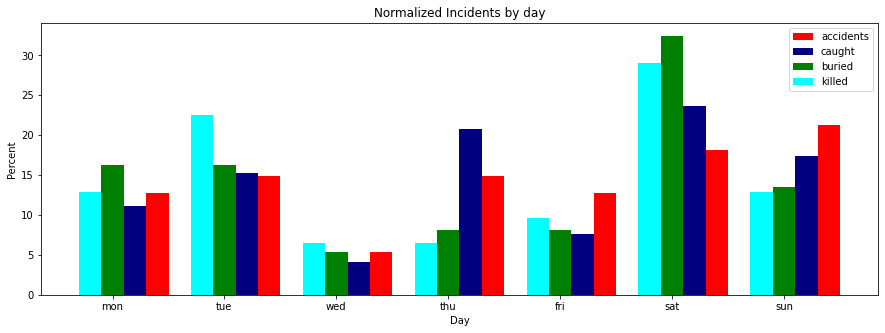

In [11]:
width = 0.2
x = np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(x + width*2,accidents,width, color = ["red"])
plt.bar(x + width,caught,width, color = ["navy"])
plt.bar(x ,buried,width, color = ["green"])
plt.bar(x - width ,deaths,width, color = ["cyan"])

                       
plt.legend(['accidents', 'caught', 'buried', 'killed'])
plt.title('Normalized Incidents by day')
plt.xlabel('Day')
plt.ylabel('Percent')

plt.xticks(x,labels)

plt.show()

**The most problematic day seems to be Saturday. This is likely because this day has the greatest number people recreating in avi terrain.**

#### Is there a pattern in avi-forecast leading up to an incident?


In [33]:
test = df
test['d_below'] = -1
test['d_near'] = -1
test['d_above'] = -1

In [34]:
for x in range(10):
    data = pd.read_csv("./data/clean/2020_09_11/2020-09-11_zone_" + str(x) + "_aviDanger_C.csv")
    df_zone = pd.DataFrame(data = data)
    df_zone['date'] = pd.to_datetime(df_zone.date) 

    indices = test.index[test["zone_id"] == x]
    for index in indices:
        try:
            date = test.loc[index]['date']

            d_below = df_zone['danger_below'][df_zone['date'] == date].values[0]
            test.at[index, 'd_below'] = d_below

            d_near =   df_zone['danger_near'][df_zone['date'] == date].values[0]
            test.at[index, 'd_near'] = d_near

            d_above =  df_zone['danger_above'][df_zone['date'] == date].values[0]
            test.at[index, 'd_above'] = d_above

        except:
            print("Missing data for from {} in zone: {}.".format(date,x))
            pass

Missing data for from 2018-10-15 00:00:00 in zone: 1.
Missing data for from 2013-11-21 00:00:00 in zone: 1.
Missing data for from 2013-11-24 00:00:00 in zone: 1.
Missing data for from 2015-05-31 00:00:00 in zone: 2.
Missing data for from 2013-12-22 00:00:00 in zone: 2.
Missing data for from 2018-11-02 00:00:00 in zone: 3.
Missing data for from 2015-05-03 00:00:00 in zone: 4.
Missing data for from 2017-11-18 00:00:00 in zone: 4.
Missing data for from 2015-05-17 00:00:00 in zone: 4.
Missing data for from 2014-11-03 00:00:00 in zone: 5.


In [27]:
test.head(10)

,date,zone_id,activity,caught,buried,killed,weekend,d_below,d_near,d_above
0,2017-02-14,0,sm,2,1,1,False,2,2,2
1,2017-01-12,0,sk,1,0,0,False,3,3,3
2,2019-12-15,0,sb,2,1,0,True,3,3,3
3,2016-12-11,0,sm,1,2,0,True,2,3,3
4,2013-12-31,0,sb,1,1,1,False,2,2,2
5,2019-12-08,0,sk,1,1,1,True,3,3,3
6,2020-01-22,1,sk,1,0,0,False,1,2,2
7,2018-10-15,1,ft,1,0,0,False,None,None,None
8,2013-11-21,1,ft,1,0,0,False,None,None,None
9,2020-01-19,1,ft,1,0,0,True,1,2,2


In [113]:
# Remove rows where forecast data is missing
dfAviDanger = test
dropIndex = dfAviDanger.index[dfAviDanger["d_below"] == -1]
dfAviDanger = dfAviDanger.drop(dropIndex)
avg_danger = []
for x in dfAviDanger.index:
    avg = (dfAviDanger["d_below"][x] + dfAviDanger["d_near"][x] + dfAviDanger["d_above"][x]) / 3
    avg_danger.append(np.round(avg, decimals = 1))
dfAviDanger["avg_danger_day_of"] = avg_danger

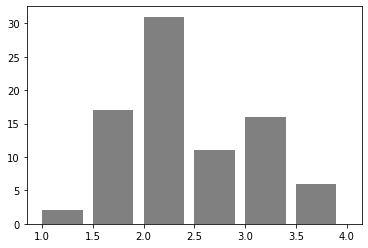

In [135]:
_ = plt.hist(dfAviDanger["avg_danger_day_of"], color = "grey", bins = [1,1.5,2,2.5,3,3.5,4], width = 0.4)

Most avi accidents occured on moderate day forecasts. I wonder what percentage occurred on moderate days and the weekend. 